In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import signal
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
song_df = pd.read_hdf('song_df.h5', 'song_df')
X = song_df.MFCC.values
y = song_df.Type.values

In [3]:
X_new = np.zeros((1440, 299*13))
for i,d in enumerate(X):
    X_new[i,:] = d[:, :].flatten()
print(X_new.shape)
X = X_new

(1440, 3887)


In [4]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.06751662 0.05099659]
0.11851321499315493


#### First two components only explain 11% of the data which is not sufficient for clustering
#### Using T-SNE for further analysis. Reducing components for sufficient representation

In [58]:
# Reducing Dimensionality to a a sufficient number of explainability
pca = PCA(n_components=200)
pca_result = pca.fit_transform(X)

print(np.sum(pca.explained_variance_ratio_))

0.7712598011167089


In [59]:
n_sne = 1440

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=5000)
tsne_results = tsne.fit_transform(pca_result)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1440 samples in 0.012s...
[t-SNE] Computed neighbors for 1440 samples in 1.196s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1440
[t-SNE] Computed conditional probabilities for sample 1440 / 1440
[t-SNE] Mean sigma: 255.369004
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.581192
[t-SNE] Error after 1450 iterations: 1.451477


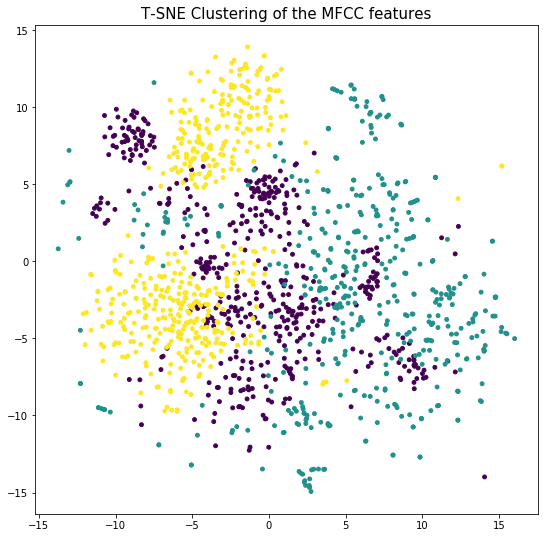

In [68]:
%matplotlib inline

fig = plt.figure(figsize=(9, 9))
plt.title("T-SNE Clustering of the MFCC features", fontsize=15)
plt.scatter(tsne_results[:, 0], tsne_results[:,1], c=y, s=15)
plt.show()
fig.savefig("./images/tsne_cluster.pdf", bbox_inches='tight')